In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import pickle
xgb.set_config(verbosity=1) #turn down info

import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_set = pd.read_csv('train_set.csv')
val_set = pd.read_csv('test_set.csv')
test_set = pd.read_csv('final_testing_set.csv')

In [3]:
train_set.head()

,MEMBER_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET
0,1764912,0.219345,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1218552,-1.102985,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52971,-0.709514,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1996437,0.421646,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,26396,0.864928,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_set.head()

,MEMBER_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_9.,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na
0,1732790,0.385471,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1625715,-1.084619,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1877119,-0.397297,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1447339,-1.588841,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1613386,-0.389505,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = np.array(train_set['TARGET'])
x_train = np.array(train_set.drop(['TARGET', 'MEMBER_ID' ], axis=1))

y_val = np.array(val_set['TARGET'])
x_val = np.array(val_set.drop(['TARGET', 'MEMBER_ID' ], axis=1))

## y_test does not exists 
x_test = np.array(test_set.drop(['MEMBER_ID'], axis=1))

In [6]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape)

(1075926, 202) (1075926,)
(358643, 202) (358643,)
(964775, 202)


# Check model performance: accuracy, precision, recall


### Train set

In [7]:
file_name = "xgb_model.pkl"

xgb_model_loaded = pickle.load(open(file_name, "rb"))

y_pred = xgb_model_loaded.predict(x_train)
y_true = y_train

accuracy = sum(y_pred == y_true)/ len(y_pred)
recall_score = sklearn.metrics.recall_score( y_true, y_pred) 
precision_score = sklearn.metrics.precision_score(y_true, y_pred) 

print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))
print("Presicion on testing set:", precision_score)
print("Recall on testing set:", recall_score)


Accuracy on testing set: 89.2889 %
Presicion on testing set: 0.7578726632504079
Recall on testing set: 0.5653476129969142


In [8]:
train_set['PREDICTION'] = y_pred
train_set.head(20)

,MEMBER_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET,PREDICTION
0,1764912,0.219345,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1218552,-1.102985,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52971,-0.709514,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1996437,0.421646,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,26396,0.864928,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1041451,0.717724,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1200157,0.806491,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2030757,1.621539,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
8,1370970,-1.443585,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
9,1841912,-0.346374,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


### Validation set

In [9]:
file_name = "xgb_model.pkl"

xgb_model_loaded = pickle.load(open(file_name, "rb"))

y_pred = xgb_model_loaded.predict(x_val)
y_true = y_val

accuracy = sum(y_pred == y_true)/ len(y_pred)
recall_score = sklearn.metrics.recall_score( y_true, y_pred) 
precision_score = sklearn.metrics.precision_score(y_true, y_pred) 

print("\nAccuracy on testing set: {:.4f} %".format(accuracy*100))
print("Presicion on testing set:", precision_score)
print("Recall on testing set:", recall_score)


Accuracy on testing set: 89.1915 %
Presicion on testing set: 0.7559026281775096
Recall on testing set: 0.5612264482902019


In [10]:
val_set['PREDICTION'] = y_pred
val_set.head(20)

,MEMBER_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,TARGET,PREDICTION
0,2105828,1.893685,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,612053,0.645096,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,2633714,1.774586,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,909601,-1.206501,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,2397673,0.091064,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,2412697,-0.563701,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1166852,-0.524744,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2187392,-1.704323,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,2101936,-1.951703,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,2406064,1.054985,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Text(0.5, 13.421126458070283, 'Predicted label')

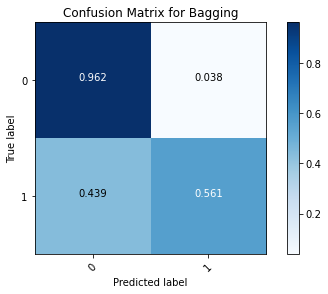

In [11]:
classes = [0,1]
cm = confusion_matrix(y_true, y_pred, normalize ='true')

plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for Bagging")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3), horizontalalignment="center", color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Final predictions:

In [12]:
file_name = "xgb_model.pkl"
xgb_model_loaded = pickle.load(open(file_name, "rb"))
y_pred = xgb_model_loaded.predict(x_test)

In [13]:
test_set['PREDICTION'] = y_pred
test_set.head()

,MEMBER_ID,AGE,HAS_AE,HAS_AW,HAS_IP,LOGICAL_FACTOR_1,LOGICAL_FACTOR_2,SEX_K,SEX_M,SEX_N,...,PKD_GROUP_90,PKD_GROUP_91,PKD_GROUP_93,PKD_GROUP_95,PKD_GROUP_96,PKD_GROUP_97,PKD_GROUP_98,PKD_GROUP_99,PKD_GROUP_na,PREDICTION
0,1732790,0.385471,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1625715,-1.084619,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1877119,-0.397297,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1447339,-1.588841,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1613386,-0.389505,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_set[['MEMBER_ID', 'PREDICTION']].to_csv('final_testing_solution.csv',index = False)